## EDA LAB - Nora Wiktorowicz -
working in a group with Dean Chenzaie - mtk7hg@virginia.edu

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest.
2. Write a short description of the data you chose, and why. (1 page)
3. Load the data using Pandas. Clean them up for EDA. Do this in a notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations. (1-3 pages)
5. Describe your findings in 1-2 pages.
6. If you have other content that you think absolutely must be included, you can include it in an appendix of any length.

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.

Feel free to work with other people in groups, and ask questions!

In [ ]:
# imports
import requests
import urllib.request
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **1. Download a small (5-15) set of variables of interest.**

In [16]:
df = pd.read_parquet('https://github.com/DS3001/project_gss/raw/main/gss_chunk_1.parquet')
df = pd.read_parquet('https://github.com/DS3001/project_gss/raw/main/gss_chunk_2.parquet')
df = pd.read_parquet('https://github.com/DS3001/project_gss/raw/main/gss_chunk_3.parquet')


In [90]:
var_list = ['papres10', 'mapres10', 'degree', 'rincome', 'hrs2', 'marital', 'agewed', 'padeg', 'madeg'] # List of variables you want to save
output_variables = 'selected_gss_data.csv' # Name of the file you want to save the data to
phase = 0 # Starts in write mode; after one iteration of loop, switches to append mode

for k in range(3): # for each chunk of the data
    url = 'https://github.com/DS3001/project_gss/raw/main/gss_chunk_' + str(1+k) + '.parquet' # Create url to the chunk to be processed
    print(url) # Check the url is correct
    df = pd.read_parquet(url) # Download this chunk of data
    print(df.head()) # Visually inspect the first few rows
    if phase == 0 :
        df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                                mode='w', # control write versus append
                                header=var_list, # variable names
                                index=False) # no row index saved
        phase = 1 # Switch from write mode to append mode
    elif phase == 1 :
        df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                                mode='a', # control write versus append
                                header=None, # variable names
                                index=False) # no row index saved
        phase = 1 # Switch from write mode to append mode

https://github.com/DS3001/project_gss/raw/main/gss_chunk_1.parquet
   year  id            wrkstat  hrs1  hrs2 evwork    occ  prestige  \
0  1972   1  working full time   NaN   NaN    NaN  205.0      50.0   
1  1972   2            retired   NaN   NaN    yes  441.0      45.0   
2  1972   3  working part time   NaN   NaN    NaN  270.0      44.0   
3  1972   4  working full time   NaN   NaN    NaN    1.0      57.0   
4  1972   5      keeping house   NaN   NaN    yes  385.0      40.0   

         wrkslf wrkgovt  ...  agehef12 agehef13 agehef14  hompoph wtssps_nea  \
0  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
1  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
2  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
3  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
4  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   

   wtssnrps_nea  wtssps_next wt

# **2. Write a short description of the data you chose, and why. (1 page)**

COPY THIS FROM GOOGLE DOC!!

# **3. Load the data using Pandas. Clean them up for EDA. Do this in a notebook with comments or markdown chunks explaining your choices.**

In [91]:
df = pd.read_csv(output_variables) #load data with my selected variables
print(df.info()) #print data to ensure that the correct variables are selected and view variable information. We see that the variables match with our selected data.
print(df.head()) #print first few rows of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72390 entries, 0 to 72389
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   papres10  57219 non-null  float64
 1   mapres10  26352 non-null  float64
 2   degree    72194 non-null  object 
 3   rincome   42333 non-null  object 
 4   hrs2      1401 non-null   float64
 5   marital   72339 non-null  object 
 6   agewed    26543 non-null  float64
 7   padeg     54509 non-null  object 
 8   madeg     63419 non-null  object 
dtypes: float64(4), object(5)
memory usage: 5.0+ MB
None
   papres10  mapres10                 degree rincome  hrs2        marital  \
0      45.0       NaN             bachelor's     NaN   NaN  never married   
1      39.0       NaN  less than high school     NaN   NaN        married   
2      35.0       NaN            high school     NaN   NaN        married   
3      53.0       NaN             bachelor's     NaN   NaN        married   
4      40.0       NaN

We see that there are many instances of missing data, especially within the mapres10, rincome, and hrs2 variables. To improve data quality, we want to drop rows with missing data.

In [92]:
df = df.dropna(subset=['rincome', 'mapres10', 'hrs2']) #we want to drop rows with missing data, specifically in the mapres10, rincome, and hrs2 variables. If we drop all rows with missing data from each variable, the dataset may be empty (as there are many missing values).
print(df.head()) #print the first 5 rows to examine changes


       papres10  mapres10       degree           rincome  hrs2        marital  \
29432      48.0      48.0  high school  $1,000 to $2,999  50.0  never married   
29495      38.0      38.0  high school  $3,000 to $3,999  20.0      separated   
29529      53.0      69.0  high school   $25,000 or more  30.0        widowed   
29660      26.0      28.0  high school   $25,000 or more  40.0       divorced   
29781      72.0      64.0     graduate   $25,000 or more  40.0        married   

       agewed                  padeg                  madeg  
29432     NaN               graduate            high school  
29495    18.0                    NaN                    NaN  
29529    21.0                    NaN            high school  
29660    17.0  less than high school  less than high school  
29781     NaN            high school            high school  


Next, we want to convert all numeric variables to floats, and all categorical variables to categories. This will allow us to further analyze the data.

In [149]:
df['papres10'] = pd.to_numeric(df['papres10'], errors='coerce') #Convert numeric values
df['mapres10'] = pd.to_numeric(df['mapres10'], errors='coerce')
df['hrs2'] = pd.to_numeric(df['hrs2'], errors='coerce')
df['agewed'] = pd.to_numeric(df['agewed'], errors='coerce')

df['degree'] = df['degree'].astype('category') #Convert categorical variables
df['rincome'] = df['rincome'].astype('category')
df['marital'] = df['marital'].astype('category')
df['padeg'] = df['padeg'].astype('category')
df['madeg'] = df['madeg'].astype('category')

print(df.dtypes) #Examine the datatypes to ensure accuracy


papres10     float64
mapres10     float64
degree      category
rincome     category
hrs2         float64
marital     category
agewed       float64
padeg       category
madeg       category
dtype: object


# **4. Produce some numeric summaries and visualizations. (1-3 pages)**

In [150]:
#Produce numeric summaries

#Print summary statistics
summary_stats = df.describe()
print(summary_stats)

#Correlation between papres10 and mapres10
correlation = df['papres10'].corr(df['mapres10'])
print(f"Correlation between papres10 and mapres10: {correlation:.2f}")

#Percentage of people in each marriage status group
marital_percentage = df['marital'].value_counts(normalize=True) * 100
print("\nPercentage of People in Each Marital Status:")
print(marital_percentage)

#Descriptive stats for papres 10 grouped by level of degree held
degree_grouped = df.groupby('degree')['papres10'].describe()
print("\nDescriptive statistics for 'papres10' by 'degree':")
print(degree_grouped)

#Descriptive stats for mapres 10 grouped by level of degree held
degree_grouped = df.groupby('degree')['mapres10'].describe()
print("\nDescriptive statistics for 'mapres10' by 'degree':")
print(degree_grouped)

#Income by prestige of occupation held by respondent's Fother
income_occupation = df.groupby('rincome')['papres10'].describe()
print("\nDescriptive statistics for 'papres10' by 'rincome':")
print(income_occupation)

#Income by prestige of occupation held by respondent's Mother
income_occupation = df.groupby('rincome')['mapres10'].describe()
print("\nDescriptive statistics for 'mapres10' by 'rincome':")
print(income_occupation)

#Stats for marriage status grouped by agewed
marital_agewed = df.groupby('marital')['agewed'].describe()
print("\nDescritive statistics for Agewed by Marital Status")
print(marital_agewed)

         papres10    mapres10        hrs2     agewed
count  353.000000  458.000000  458.000000   9.000000
mean    44.283286   41.930131   39.275109  19.333333
std     13.025507   13.376534   13.545558   2.783882
min     24.000000   16.000000    1.000000  16.000000
25%     35.000000   31.000000   35.000000  17.000000
50%     43.000000   38.000000   40.000000  19.000000
75%     50.000000   48.000000   45.000000  21.000000
max     80.000000   80.000000   89.000000  24.000000
Correlation between papres10 and mapres10: 0.33

Percentage of People in Each Marital Status:
marital
married          49.563319
never married    27.292576
divorced         14.192140
widowed           6.331878
separated         2.620087
Name: proportion, dtype: float64

Descriptive statistics for 'papres10' by 'degree':
        count       mean        std   min   25%   50%   75%   max
degree                                                           
0       142.0  40.401408  11.562387  24.0  32.0  38.5  46.0  75.0
1  

<ipython-input-150-453132bd772c>:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  degree_grouped = df.groupby('degree')['papres10'].describe()
<ipython-input-150-453132bd772c>:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  degree_grouped = df.groupby('degree')['mapres10'].describe()
<ipython-input-150-453132bd772c>:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_occupation = df.groupby('rincome')['papres10']

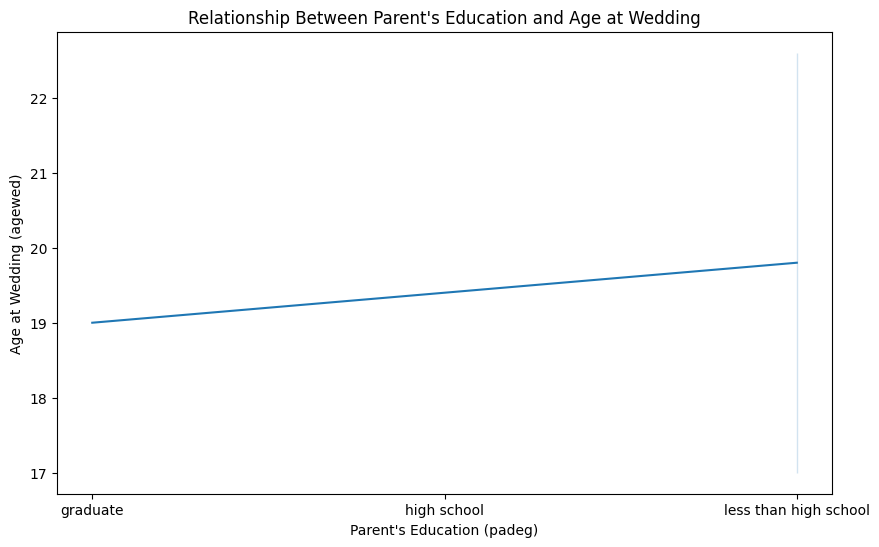

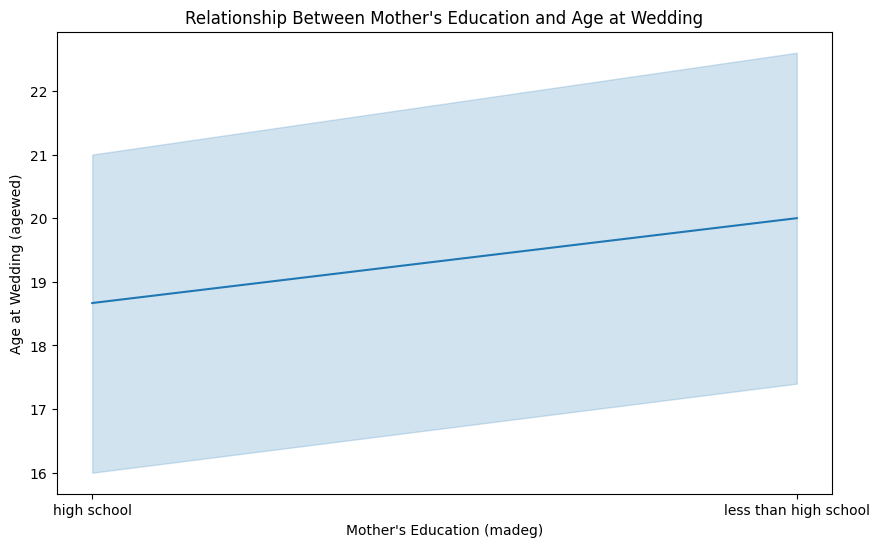

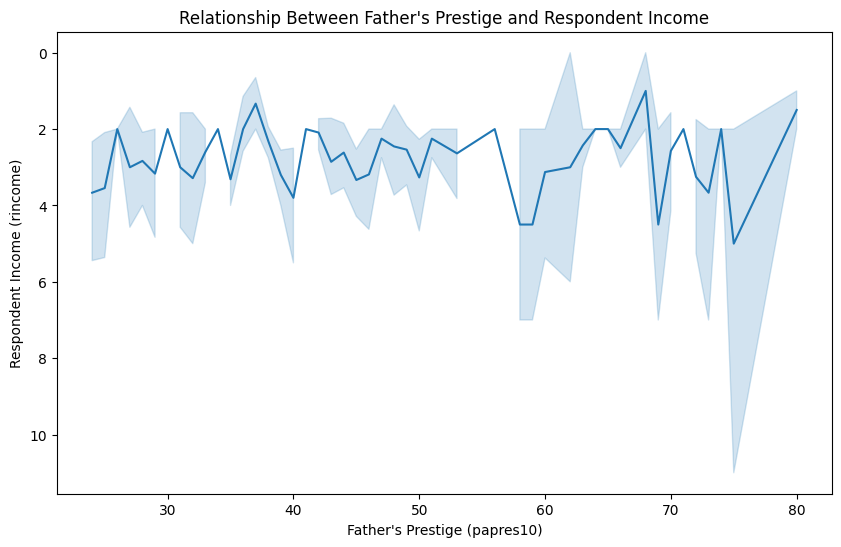

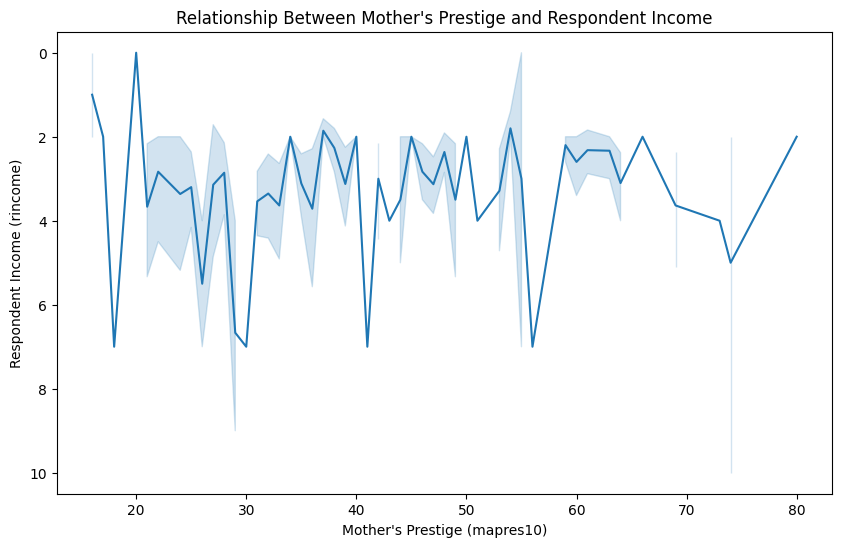

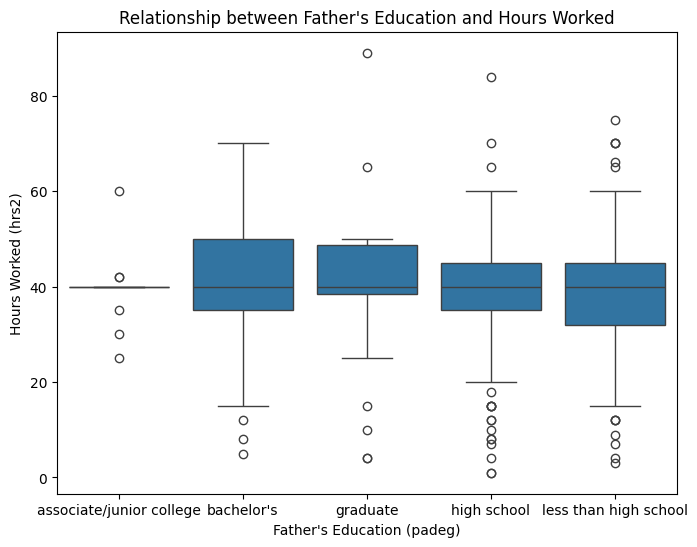

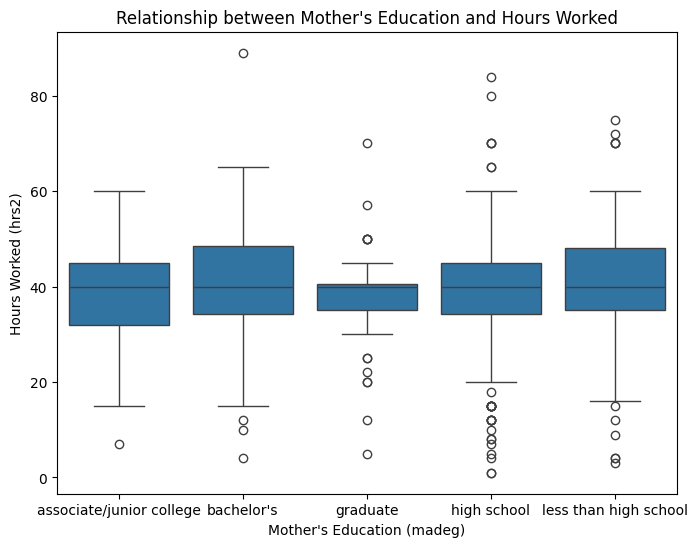

In [152]:
#Create visualizations

#Created a lineplot of the relationship between father's degree and age married
plt.figure(figsize=(10, 6))
sns.lineplot(x='padeg', y='agewed', data=df)
plt.title('Relationship Between Parent\'s Education and Age at Wedding')
plt.xlabel('Parent\'s Education (padeg)')
plt.ylabel('Age at Wedding (agewed)')
plt.show()

#Created a lineplot of the relationship between mother's degree and age married
plt.figure(figsize=(10, 6))
sns.lineplot(x='madeg', y='agewed', data=df)
plt.title('Relationship Between Mother\'s Education and Age at Wedding')
plt.xlabel('Mother\'s Education (madeg)')
plt.ylabel('Age at Wedding (agewed)')
plt.show()

#Created a lineplot of the relationship between father's job prestige and and respondent income
plt.figure(figsize=(10, 6))
sns.lineplot(x='papres10', y='rincome', data=df)
plt.title('Relationship Between Father\'s Prestige and Respondent Income')
plt.xlabel('Father\'s Prestige (papres10)')
plt.ylabel('Respondent Income (rincome)')
plt.show()

#Created a lineplot of the relationship between mother's job prestige and respondent income
plt.figure(figsize=(10, 6))
sns.lineplot(x='mapres10', y='rincome', data=df)
plt.title('Relationship Between Mother\'s Prestige and Respondent Income')
plt.xlabel('Mother\'s Prestige (mapres10)')
plt.ylabel('Respondent Income (rincome)')
plt.show()

#Created boxplot for relationship between father's degree and average hours worked
plt.figure(figsize=(8, 6))
sns.boxplot(x='padeg', y='hrs2', data=df)
plt.title('Relationship between Father\'s Education and Hours Worked')
plt.xlabel('Father\'s Education (padeg)')
plt.ylabel('Hours Worked (hrs2)')
plt.show()


# Created boxplot for relationship between mother's degree and average hours worked
plt.figure(figsize=(8, 6))
sns.boxplot(x='madeg', y='hrs2', data=df)
plt.title('Relationship between Mother\'s Education and Hours Worked')
plt.xlabel('Mother\'s Education (madeg)')
plt.ylabel('Hours Worked (hrs2)')
plt.show()

# **5. Describe your findings in 1-2 pages.**

ADD THIS FROM GOOGLE DOC!!!!

# **6. Appendix**
Additional Graphs

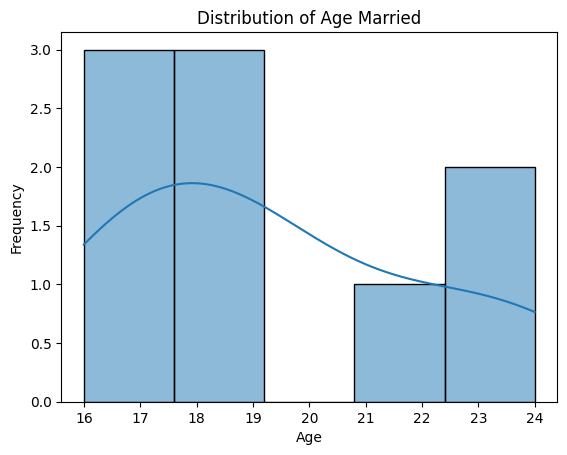

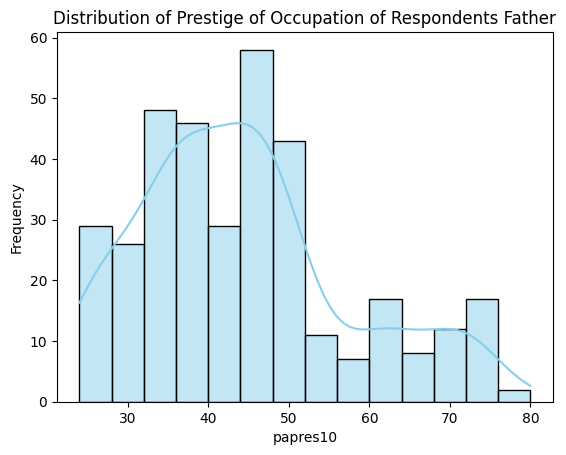

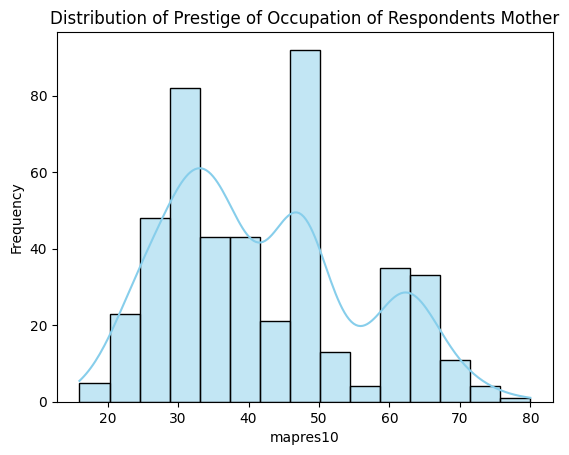

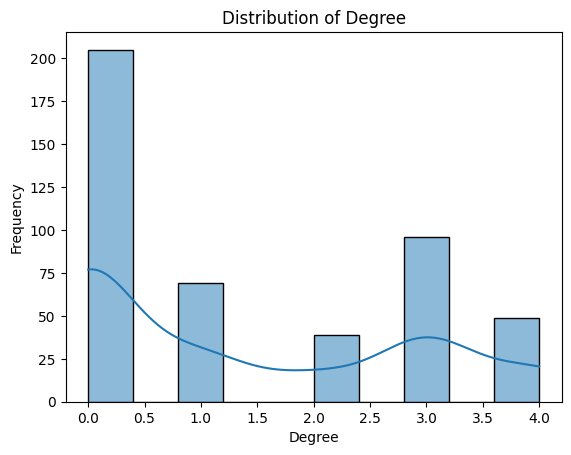

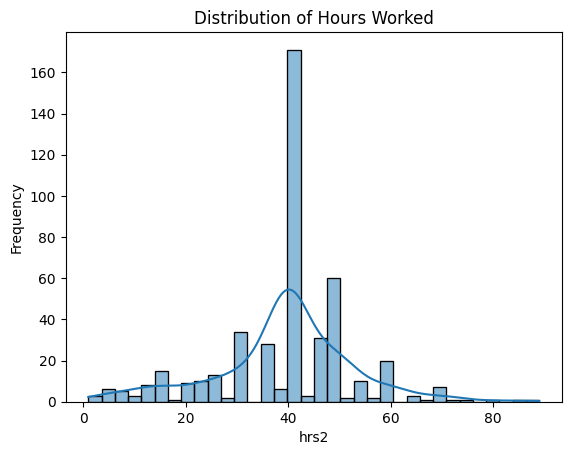

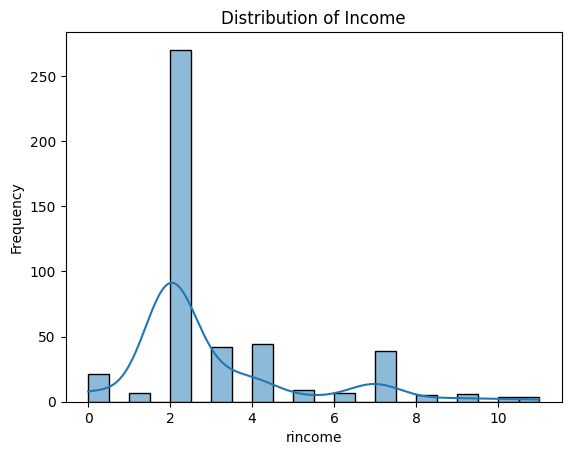

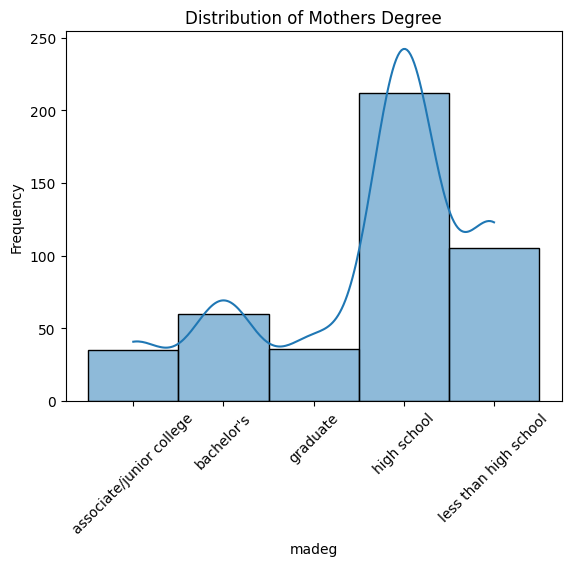

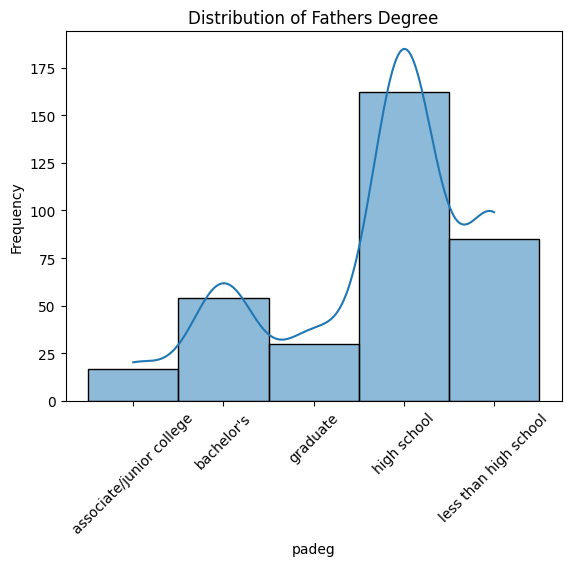

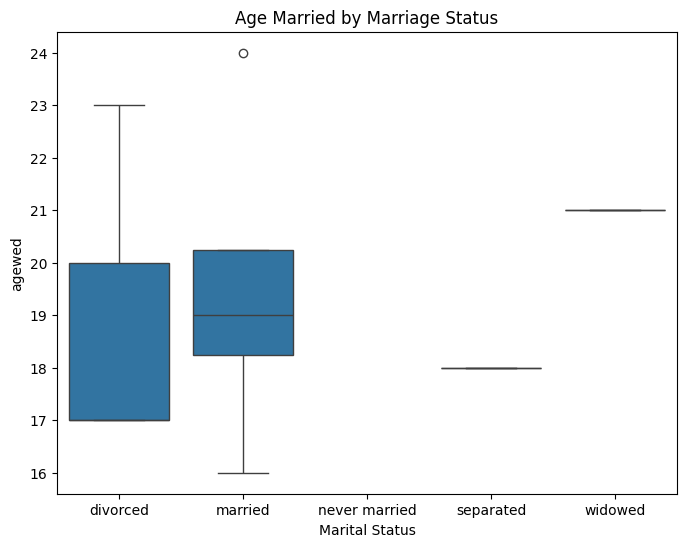

In [139]:
#Create a histogram of age at marriage
sns.histplot(df['agewed'], kde=True)
plt.title('Distribution of Age Married')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#Create a histogram of papres10
sns.histplot(df['papres10'], kde=True, color='skyblue')
plt.title('Distribution of Prestige of Occupation of Respondents Father')
plt.xlabel('papres10')
plt.ylabel('Frequency')
plt.show()

#Create a histogram of mapres10
sns.histplot(df['mapres10'], kde=True, color='skyblue')
plt.title('Distribution of Prestige of Occupation of Respondents Mother')
plt.xlabel('mapres10')
plt.ylabel('Frequency')
plt.show()

#Create a histogram of degree
sns.histplot(df['degree'], kde=True)
plt.title('Distribution of Degree')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()

#Create a histogram of hours worked
sns.histplot(df['hrs2'], kde=True)
plt.title('Distribution of Hours Worked')
plt.xlabel('hrs2')
plt.ylabel('Frequency')
plt.show()

#Create a histogram of income
sns.histplot(df['rincome'], kde=True)
plt.title('Distribution of Income')
plt.xlabel('rincome')
plt.ylabel('Frequency')
plt.show()

#Create a histogram of Mother's degree
sns.histplot(df['madeg'], kde=True)
plt.title('Distribution of Mothers Degree')
plt.xlabel('madeg')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

#Create a histogram of Father's degree
sns.histplot(df['padeg'], kde=True)
plt.title('Distribution of Fathers Degree')
plt.xlabel('padeg')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

#Boxplot of marriage status by age married
plt.figure(figsize=(8, 6))
sns.boxplot(x='marital', y='agewed', data=df)
plt.title('Age Married by Marriage Status')
plt.xlabel('Marital Status')
plt.ylabel('agewed')
plt.show()